In [23]:
"""
Created on Mon Jan 30 15:40:05 2023

@author: mrsag
"""

from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage import color,io
from PIL import Image, ImageDraw
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize
from scipy.optimize import curve_fit
from skimage.draw import line

import matplotlib
matplotlib.rcParams['figure.dpi']=300 # highres display


In [24]:
def draw_on_image(image,x,y):
    image2=np.copy(image)
    rr, cc = line(x[0],x[1],y[0],y[1])
    line_width = 1
    for i in range(-line_width//2, line_width//2 + 1):
        image2[np.clip(rr + i, 0, image.shape[0] - 1), np.clip(cc + i, 0, image.shape[1] - 1)] = [0]  # Set the color of the line (red in this example)

    #image2[rr, cc] = [1]  # Set the color of the line (red in this example)
    return(image2)

In [25]:
def linecut_function(start_point,end_point,image,image2):
    # Use the numpy function linspace to get the coordinates of the line
    num=round(np.sqrt((start_point[0]-end_point[0])**2+(start_point[1]-end_point[1])**2))
    x, y = np.linspace(start_point[0], end_point[0], num), np.linspace(start_point[1], end_point[1], num)
    image2=draw_on_image(image2, start_point,end_point)
    # Get the grayscale values along the line
    gray_values = image[x.astype(int),y.astype(int)]
    linecut=[]
    for i in range(len(gray_values)):
        linecut_value=gray_values[i]
        linecut.append(linecut_value)
        
    return(np.array(linecut),image2)

In [26]:
image_path="D:\\data Lab\\anandam data\\Mag_field_2May2023\\CCD image quarter_tilt\\C_005.tif"

image=io.imread(image_path,as_gray=True)
#image=color.rgba2rgb(image)
#image=color.rgb2gray(image)    # as image entropy only works with grayscale image
#image=resize(image,(1000,1000))

print(image.ndim)              # if image.ndim=2 then only entropy function works
print(image.shape)

2
(1024, 1024)


In [27]:
entropy_image=entropy(image, disk(14)) # creates a new image from the given image with different entropy (disorder) regions separated out by different colours
threshold=threshold_otsu(entropy_image)     # gives the best value for the pixels on the boundary of the segments of the entropy image

binary=entropy_image >= threshold   # creates a new image for which the pixel_value(entropy_image)<=threshold to give the proper segmentation 

print(threshold)

c:\Users\sagar\AppData\Local\Programs\Python\Python311\Lib\site-packages\skimage\filters\rank\generic.py:268: UserWarning: Bad rank filter performance is expected due to a large number of bins (29736), equivalent to an approximate bitdepth of 14.9.
  image, footprint, out, mask, n_bins = _preprocess_input(image, footprint,


7.5743932400870975


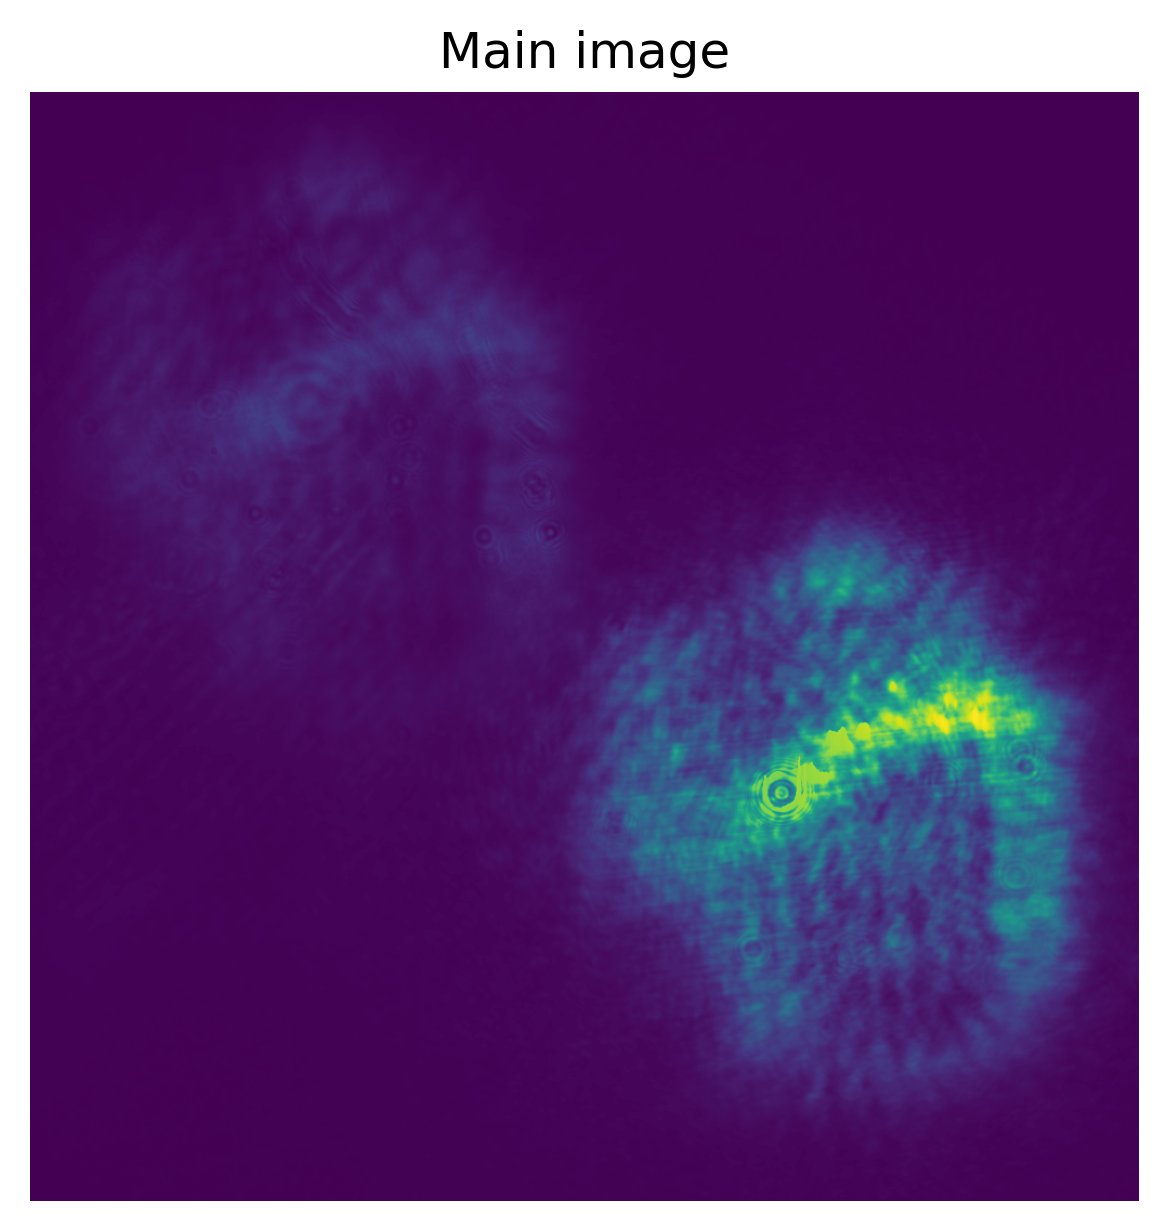

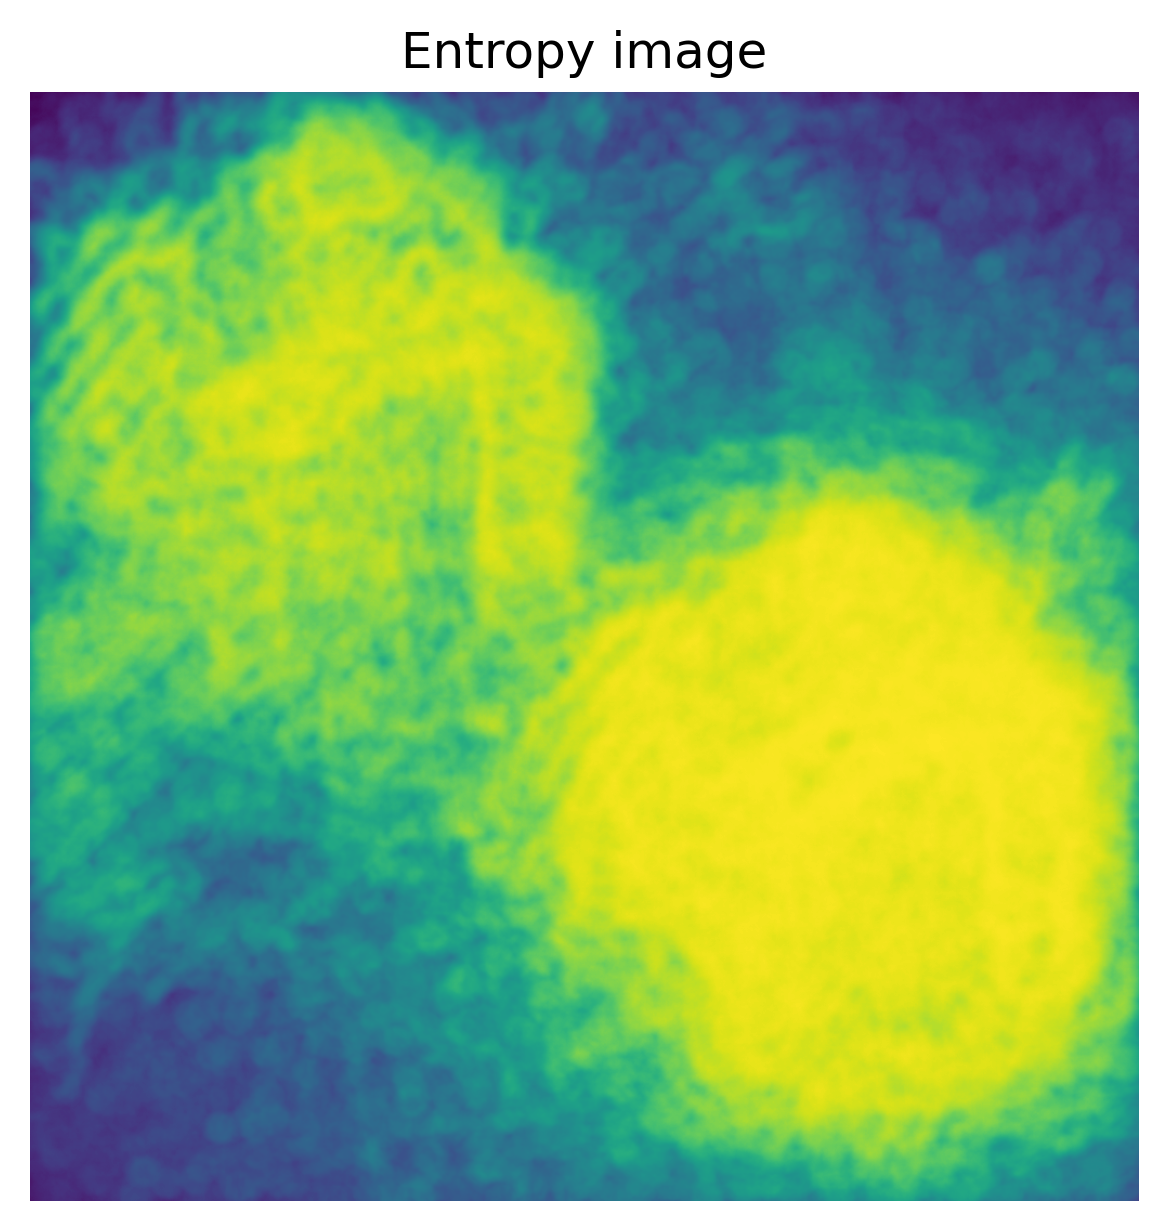

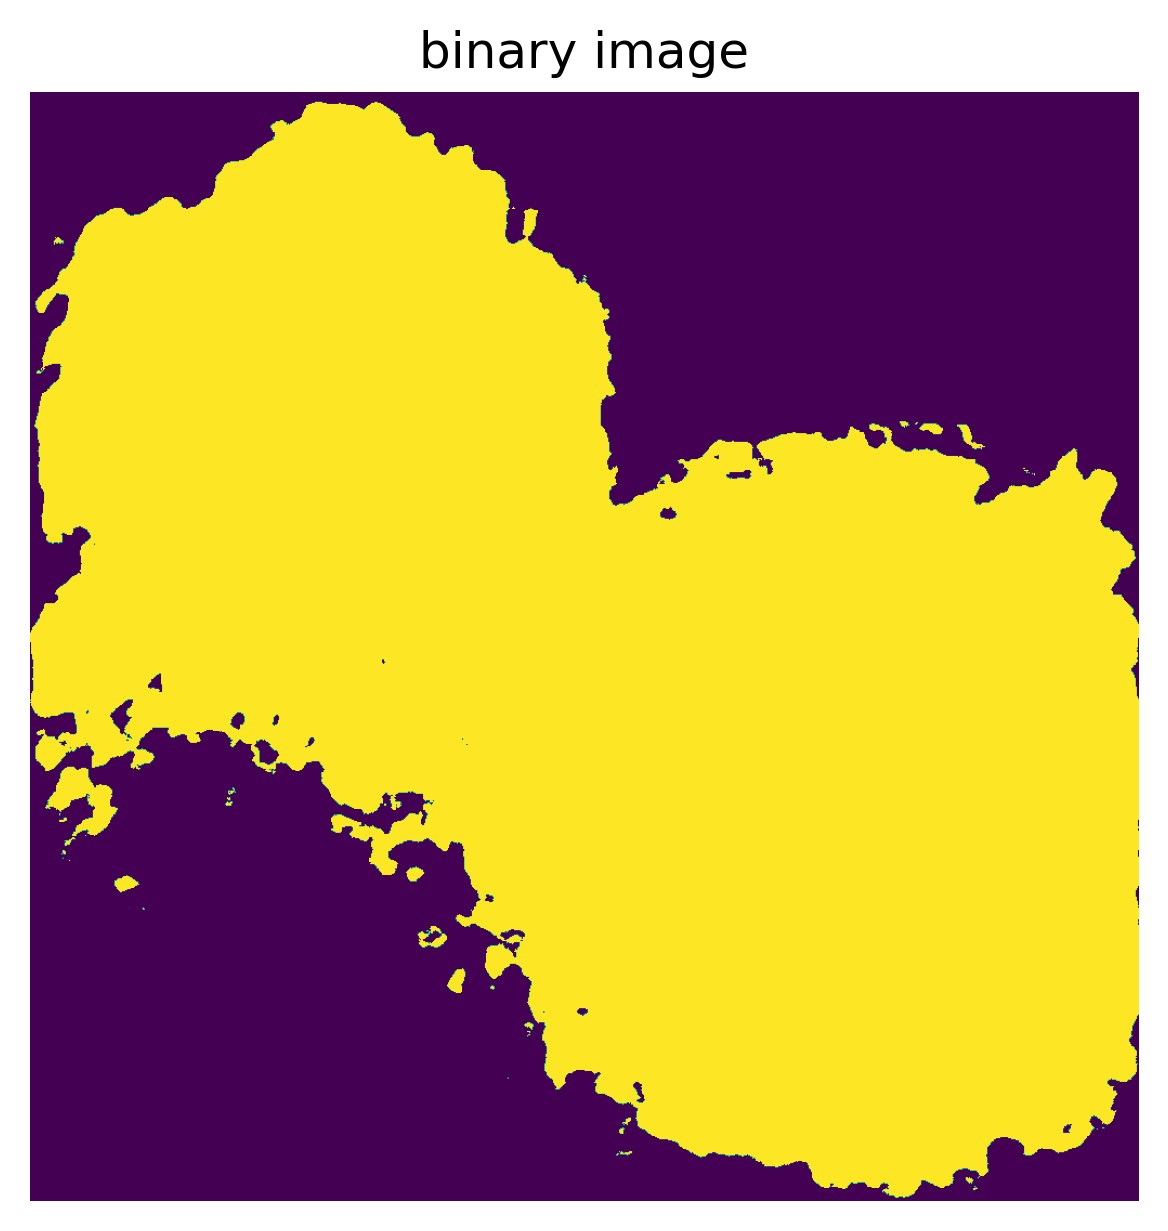

In [28]:
plt.imshow(image)
plt.title("Main image")
plt.axis("off")
plt.show()


plt.imshow(entropy_image)
plt.axis('off')
plt.title("Entropy image")
plt.show()


plt.imshow(binary)
plt.title("binary image")
plt.axis('off')
plt.show()

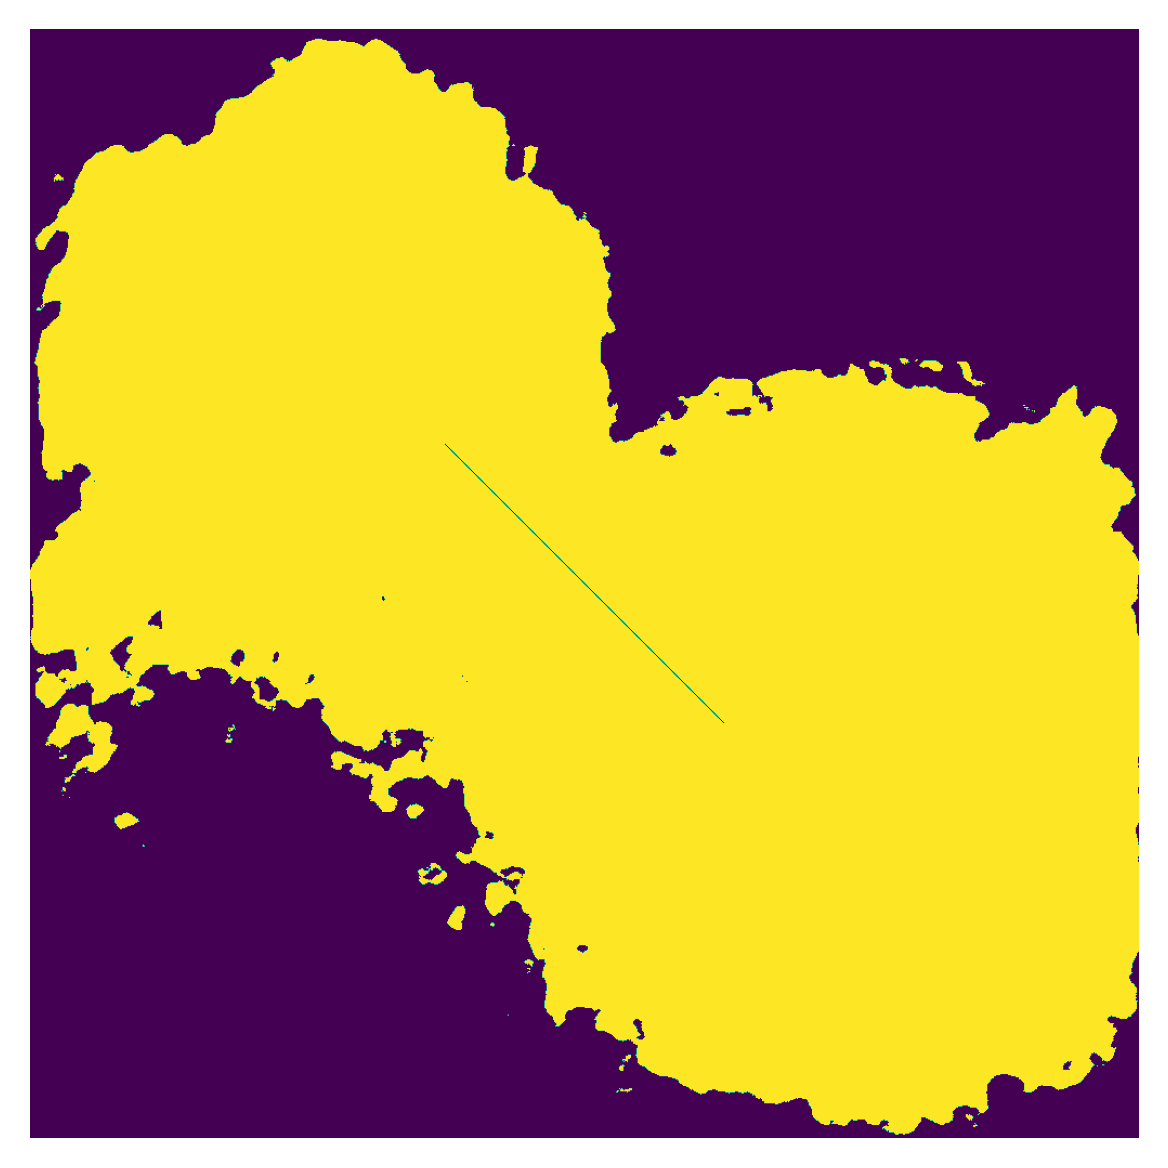

In [29]:
X=binary.shape[0]
Y=binary.shape[1]

x = (3*image.shape[0]//8,3*image.shape[1]//8)
y = (5*image.shape[0]//8,5*image.shape[1]//8)

binary2=draw_on_image(binary, x, y)
binary2=np.asarray(binary2)

plt.imshow(binary2)
plt.axis("off")
plt.show()

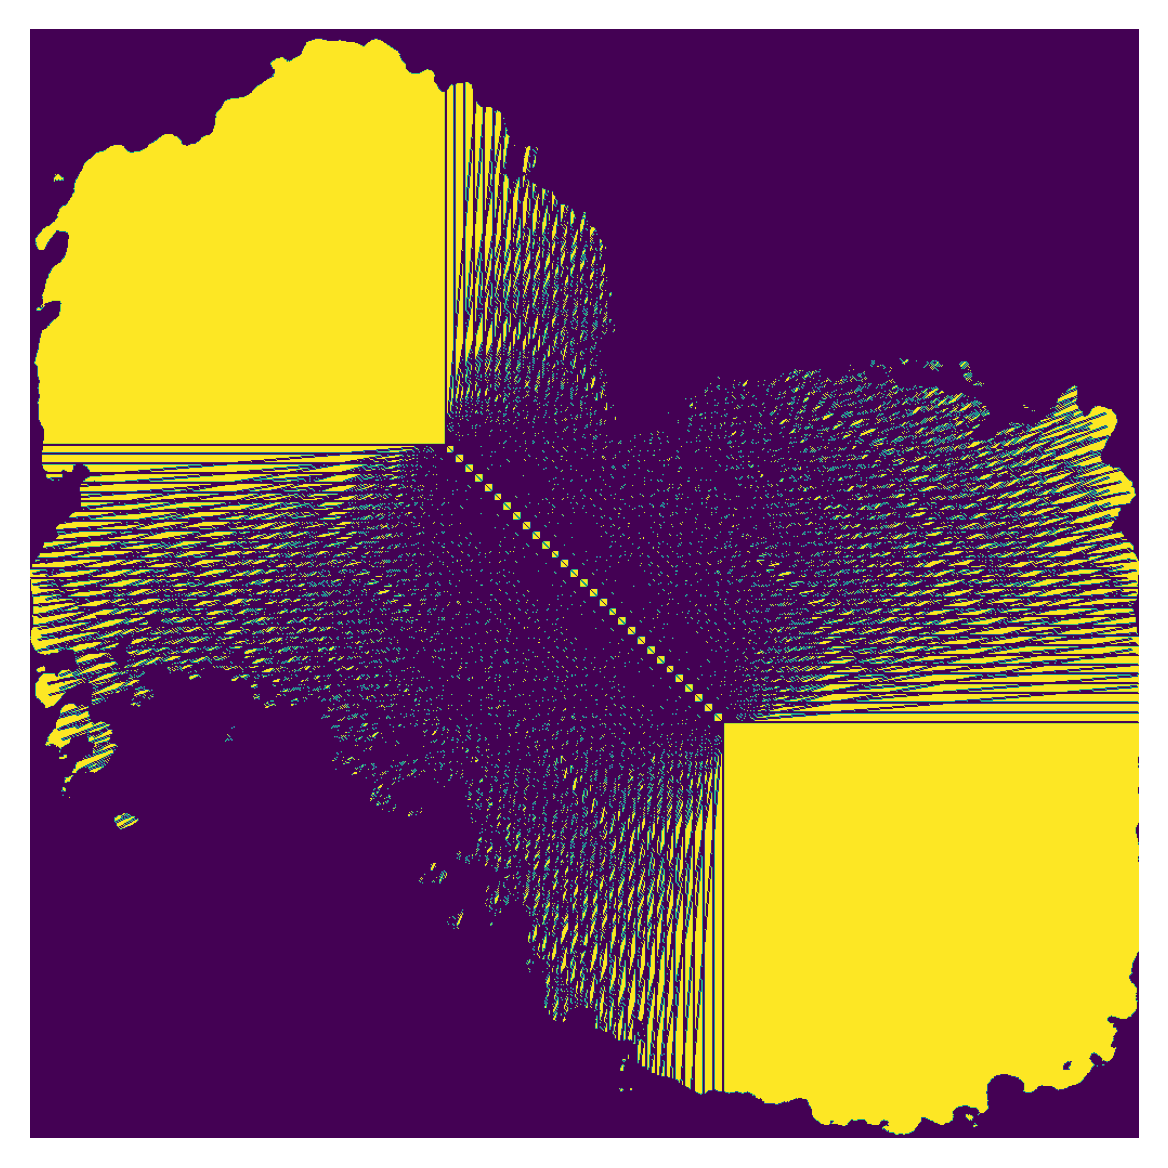

In [30]:
# Define the points
x = (3*image.shape[0]//8,3*image.shape[1]//8)
y = (5*image.shape[0]//8,5*image.shape[1]//8)

#image2=draw_on_image(image, x, y)
#plt.imshow(image2)
#plt.axis("off")

no_of_points=30

points_x=np.linspace(x[0],y[0],no_of_points)
points_y=np.linspace(x[1],y[1],no_of_points)
for i in range(len(points_x)):
    points_x[i]=int(points_x[i])
    points_y[i]=int(points_y[i])
    
linecut_ones_matrix=[]
for i in range(len(points_x)):
    radius=min([points_x[i],binary2.shape[0]-points_x[i],points_y[i],binary2.shape[1]-points_y[i]])-1
    theta_degree=np.linspace(0,90,19)    # angels, for which the linecuts will be drawn
    theta=theta_degree*np.pi/180          # angels in radian
    linecut_ones=[]
    for j in range(len(theta)):
        x1=round(points_x[i]+radius*np.sin(theta[j]))
        y1=round(points_y[i]-radius*np.cos(theta[j]))
        
        x2=round(points_x[i]-radius*np.sin(theta[j]))
        y2=round(points_y[i]+radius*np.cos(theta[j]))
        
        start_point=[x1,y1]
        end_point=[x2,y2]
        
        #binary2=draw_on_image(binary2,start_point,end_point)
        linecut,binary2=linecut_function(start_point,end_point,binary,binary2)
        #plt.plot(linecut)
        #plt.title("pixel no: (%d"%x+",%d"%y+")    theta=%d"%(theta_degree[i]))
        #plt.xlabel('start: %d'%start_point[0]+',%d'%start_point[1]+'\n end: %d'%end_point[0]+',%d'%end_point[1])
        #plt.show()
        number_of_ones=len([value for value in linecut if value > 0.5])
        linecut_ones.append(number_of_ones)
    #linecut_ones=np.array(linecut_ones)
    linecut_ones_matrix.append(linecut_ones)
    
plt.imshow(binary2)
plt.axis('off')
plt.show()

In [31]:
print(linecut_ones_matrix)
linecut_ones_matrix=np.array(linecut_ones_matrix)
m=np.min(linecut_ones_matrix)
print(m)
b = np.where(linecut_ones_matrix==m)
#print(b)
bpi=b[0][0]
bai=b[1][0]
print(bpi,bai)
print(points_x[bpi],points_y[bpi])
print(theta_degree[bai])
print(theta_degree)

[[750, 686, 640, 538, 543, 546, 544, 572, 543, 491, 517, 522, 510, 516, 549, 562, 626, 622, 644], [759, 719, 682, 571, 540, 548, 524, 554, 510, 492, 495, 513, 507, 528, 558, 583, 572, 622, 642], [788, 749, 745, 653, 551, 547, 541, 502, 447, 473, 487, 496, 508, 526, 548, 558, 540, 633, 678], [778, 769, 814, 721, 581, 540, 547, 476, 447, 441, 468, 469, 510, 545, 545, 564, 590, 632, 686], [790, 803, 823, 775, 655, 539, 504, 425, 427, 435, 446, 459, 498, 527, 538, 532, 555, 556, 701], [808, 832, 855, 806, 736, 594, 480, 436, 413, 418, 404, 455, 500, 525, 544, 537, 570, 613, 739], [824, 858, 869, 839, 758, 683, 447, 409, 419, 409, 411, 425, 464, 493, 532, 540, 554, 630, 727], [846, 880, 879, 864, 772, 670, 543, 392, 383, 387, 400, 432, 424, 474, 506, 537, 543, 627, 652], [876, 904, 891, 877, 828, 671, 577, 488, 376, 374, 402, 399, 403, 446, 497, 533, 582, 654, 669], [902, 923, 924, 862, 811, 679, 547, 529, 421, 379, 388, 381, 401, 411, 460, 521, 610, 648, 738], [929, 942, 942, 853, 811, 673

489.0 489.0
1.1344640137963142
0.7414382326719253


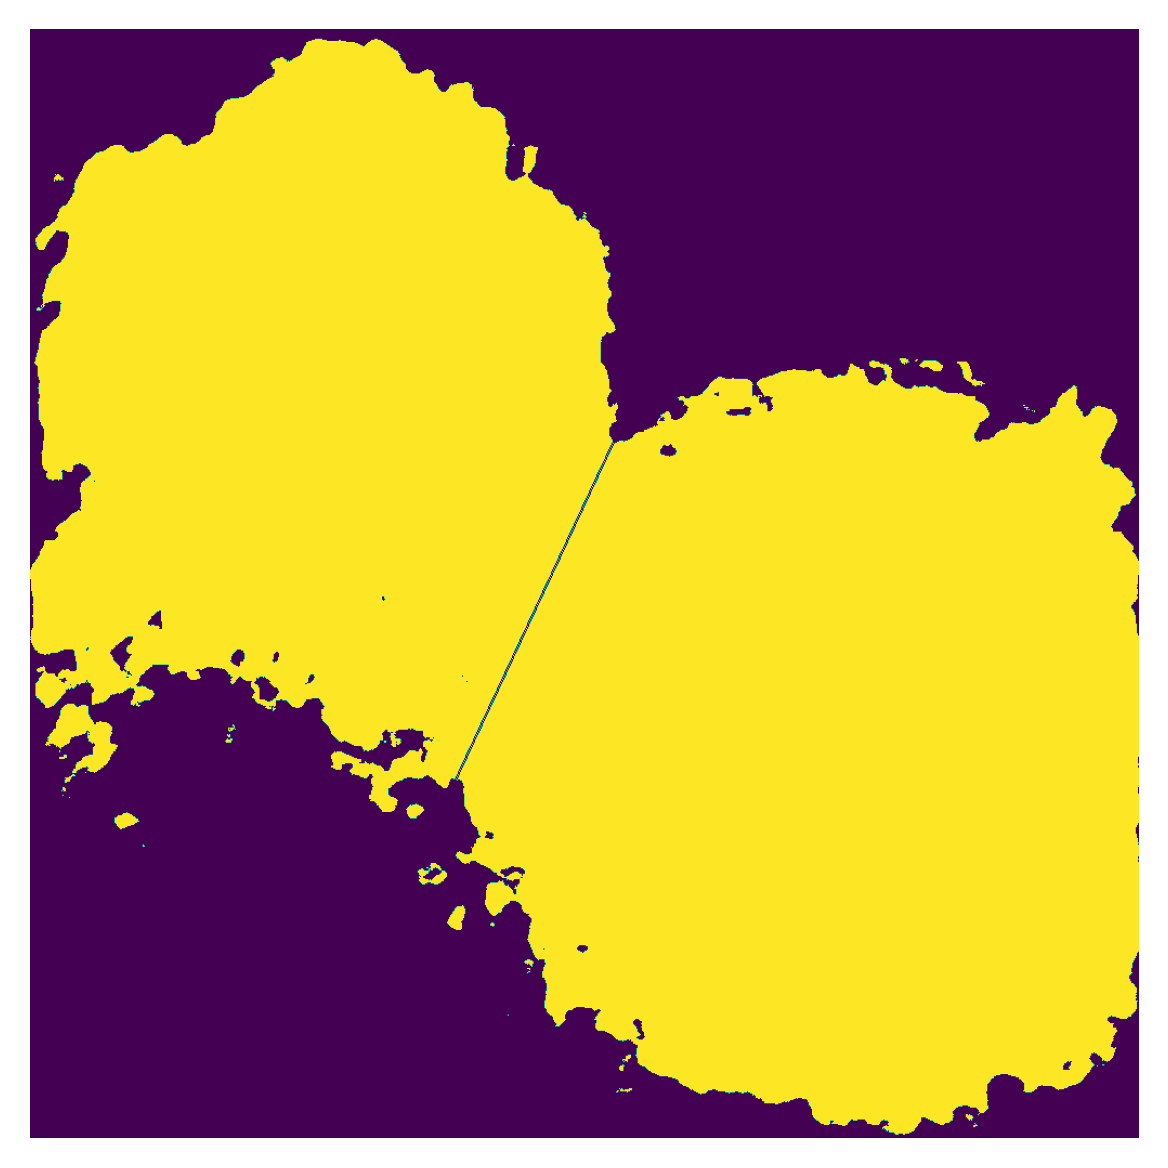

In [32]:
X=binary.shape[0]-1
Y=binary.shape[1]-1
print(points_x[bpi],points_y[bpi])
print(theta[bai])
print(np.arctan(points_x[bpi]/(Y-points_y[bpi])))

if(points_x[bpi]<=binary.shape[0]//2):
    if(theta[bai]<=np.arctan(points_x[bpi]/(Y-points_y[bpi]))):
        x1=int(points_x[bpi]+points_y[bpi]*np.tan(theta[bai]))
        y1=0
        
        x2=int(points_x[bpi]-(Y-points_y[bpi])*np.tan(theta[bai]))
        y2=Y
        
    elif(np.arctan(points_x[bpi]/(Y-points_y[bpi])) < theta[bai] <= np.arctan((X-points_x[bpi])/points_y[bpi])):
        x1=int(points_x[bpi]+points_y[bpi]*np.tan(theta[bai]))
        y1=0
        
        x2=0
        y2=int(points_y[bpi]+points_x[bpi]/np.tan(theta[bai]))
    
    elif(np.arctan((X-points_x[bpi])/points_y[bpi])<theta[bai]<np.pi/2):
        x1=X
        y1=int(points_y[bpi]-((X-points_x[bpi])/np.tan(theta[bai])))
        
        x2=0
        y2=int(points_y[bpi]+points_x[bpi]/np.tan(theta[bai]))
        
    else:
        x1=X
        y1=int(points_y[bpi])
        
        x2=0
        y2=y1
        
elif(points_x[bpi]>binary.shape[0]//2):
    if(theta[bai]<=np.arctan((X-points_x[bpi])/points_y[bpi])):
        x1=int(points_x[bpi]+points_y[bpi]*np.tan(theta[bai]))
        y1=0
        
        x2=int(points_x[bpi]-(Y-points_y[bpi])*np.tan(theta[bai]))
        y2=Y
        
    elif(np.arctan((X-points_x[bpi])/points_y[bpi]) < theta[bai] <= np.arctan(points_x[bpi]/(Y-points_y[bpi]))):
        x1=X
        y1=int(points_y[bpi]-((X-points_x[bpi])/np.tan(theta[bai])))
        
        x2=int(points_x[bpi]-(Y-points_y[bpi])*np.tan(theta[bai]))
        y2=Y
        
    elif(np.arctan(points_x[bpi]/(Y-points_y[bpi])) < theta[bai] < np.pi/2):
        x1=X
        y1=int(points_y[bpi]-((X-points_x[bpi])/np.tan(theta[bai])))
        
        x2=0
        y2=int(points_y[bpi]+points_x[bpi]/np.tan(theta[bai]))
        
    else:
        x1=X
        y1=int(points_y[bpi])
        
        x2=0
        y2=y1
        

start_point=[x1,y1]
end_point=[x2,y2]


linecut,binary2=linecut_function(start_point,end_point,binary,binary)

plt.imshow(binary2)
plt.axis("off")
plt.show()

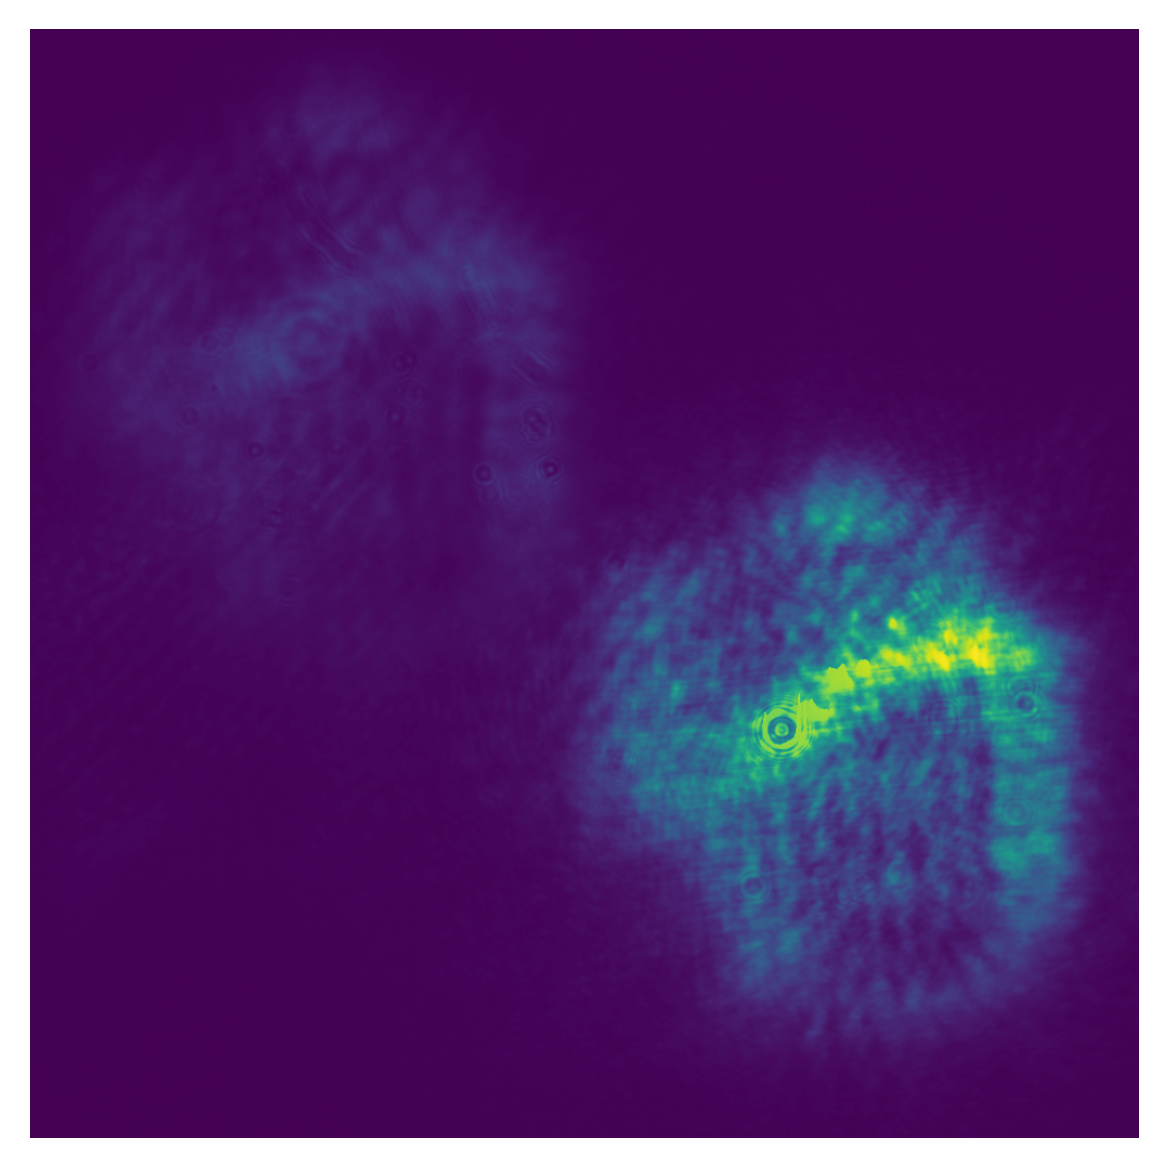

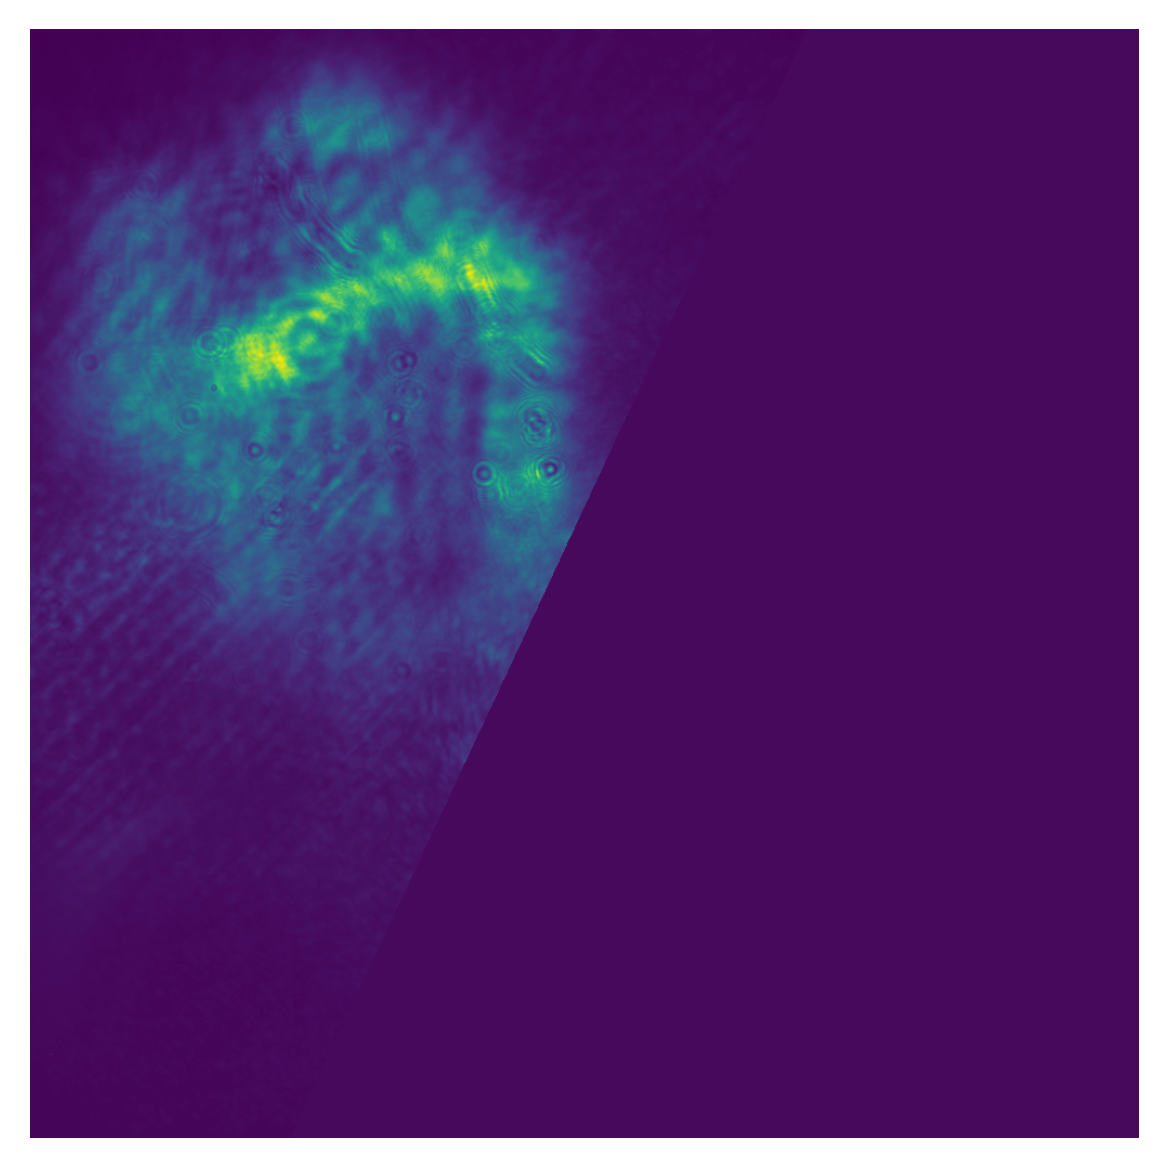

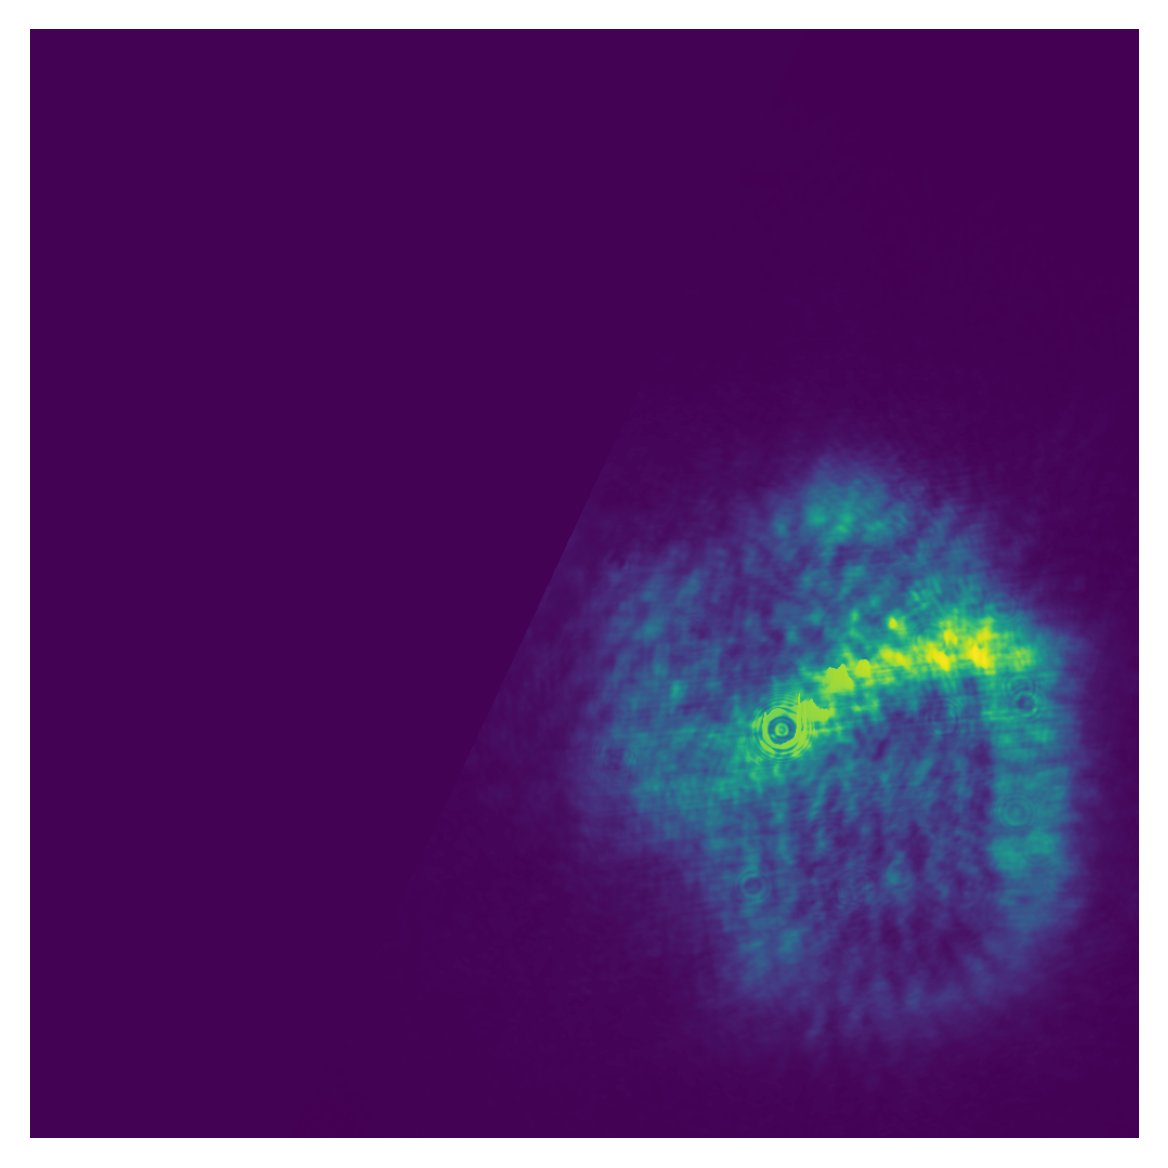

Lossy conversion from float64 to uint8. Range [972.0, 6596.0]. Convert image to uint8 prior to saving to suppress this warning.


[[ 992  999  995 ... 1011  992  991]
 [ 993  983  995 ...  998 1007 1007]
 [ 986 1002  996 ... 1005 1010 1016]
 ...
 [1038 1059 1047 ... 1073 1091 1062]
 [1043 1052 1044 ... 1072 1065 1053]
 [1038 1043 1051 ... 1049 1071 1086]]


In [33]:
X=image.shape[0]
Y=image.shape[1]

base_noise=np.mean(image[3*X//4:,:Y//4])
imagetl = np.asarray([[base_noise]*Y]*X)
imagebr = np.asarray([[base_noise]*Y]*X)

for i in range(X):
    for j in range(Y):
        if(i/np.tan(theta[bai])+j>=points_y[bpi]+points_x[bpi]/np.tan(theta[bai])):
            imagebr[i,j]=image[i,j]
            #imagetl[i,j]=base_noise*np.random.rand()
        else:
            imagetl[i,j]=image[i,j]
            #imagebr[i,j]=base_noise*np.random.rand()
            
plt.imshow(image)
plt.axis('off')
plt.show()

plt.imshow(imagetl)
plt.axis('off')
plt.show()

plt.imshow(imagebr)
plt.axis('off')
plt.show()

io.imsave("D://codes//tl.jpg",imagetl)
print(image)